In [39]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm#_notebook as tqdm


In [ ]:
fig=plt.figure(figsize=(20, 30))
columns = 4
rows = 6
n_images = columns*rows


folderGlob = '/home/rob/HWR/datasets/zooniverse/**/Label*00[2,4][0-9].jpg'
fps = glob(folderGlob)

sample = np.random.permutation(fps[:300])

for i in tqdm(range(1, n_images +1)):
    fp = sample[i-1]
    img = cv2.imread(fp)
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


100%|██████████| 24/24 [00:02<00:00,  7.02it/s]


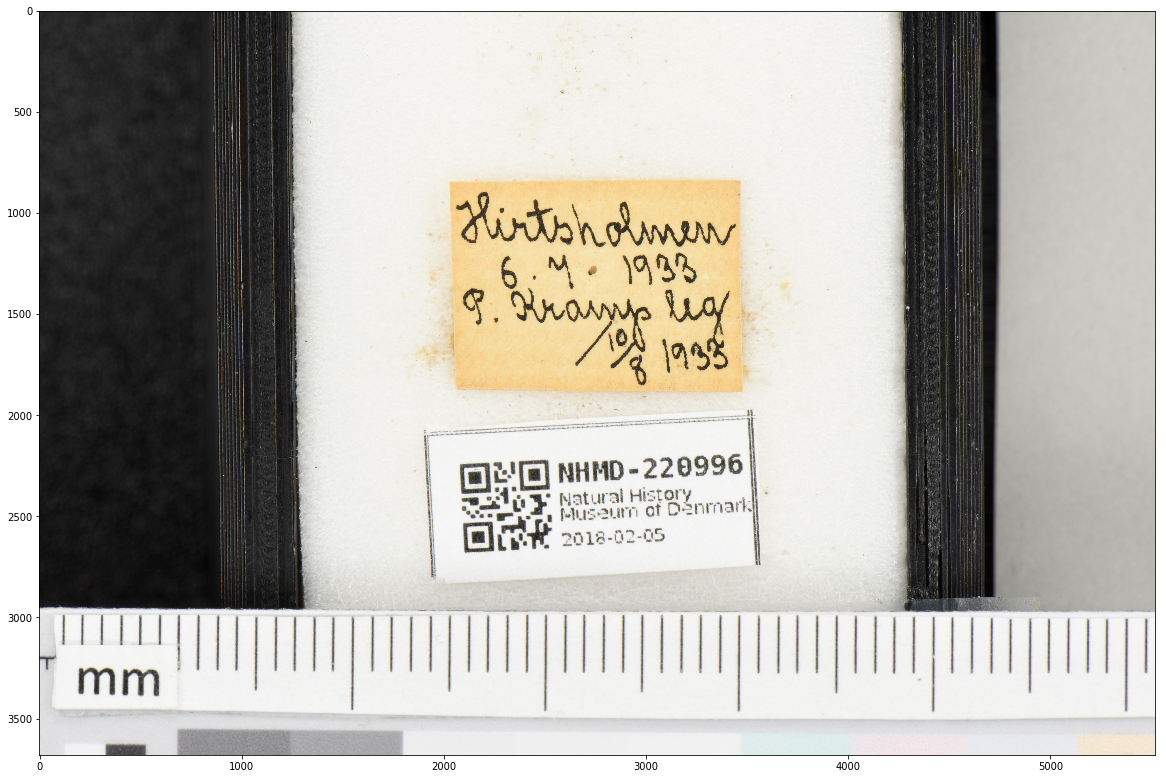

In [3]:
fp = '/home/rob/HWR/datasets/zooniverse/220996/Preview002.jpg'

raw = cv2.imread(fp)
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(raw, cv2.COLOR_BGR2RGB))

In [4]:
global start_time
def start_timer():
    global start_time
    start_time = pd.Timestamp.now()
    
def tick(msg=''):
    print(msg + ', Time Taken: %s'%(pd.Timestamp.now() - start_time))
    
start_timer()
tick()

, Time Taken: 0 days 00:00:00.000045


In [34]:
for fp in tqdm(fps):
    new_fp = fp.replace('Preview', 'Cropped')
    img = cv2.imread(fp)
    cropped = crop(img)
    cv2.imwrite(new_fp, cropped)

100%|██████████| 3833/3833 [1:56:45<00:00,  1.87s/it]  


, Time Taken: 0 days 00:00:00.010204
, Time Taken: 0 days 00:00:00.008688
, Time Taken: 0 days 00:00:00.008879
, Time Taken: 0 days 00:00:00.011123
, Time Taken: 0 days 00:00:00.010943
, Time Taken: 0 days 00:00:00.010727
, Time Taken: 0 days 00:00:00.009939
, Time Taken: 0 days 00:00:00.010279
, Time Taken: 0 days 00:00:00.009794
, Time Taken: 0 days 00:00:00.009296



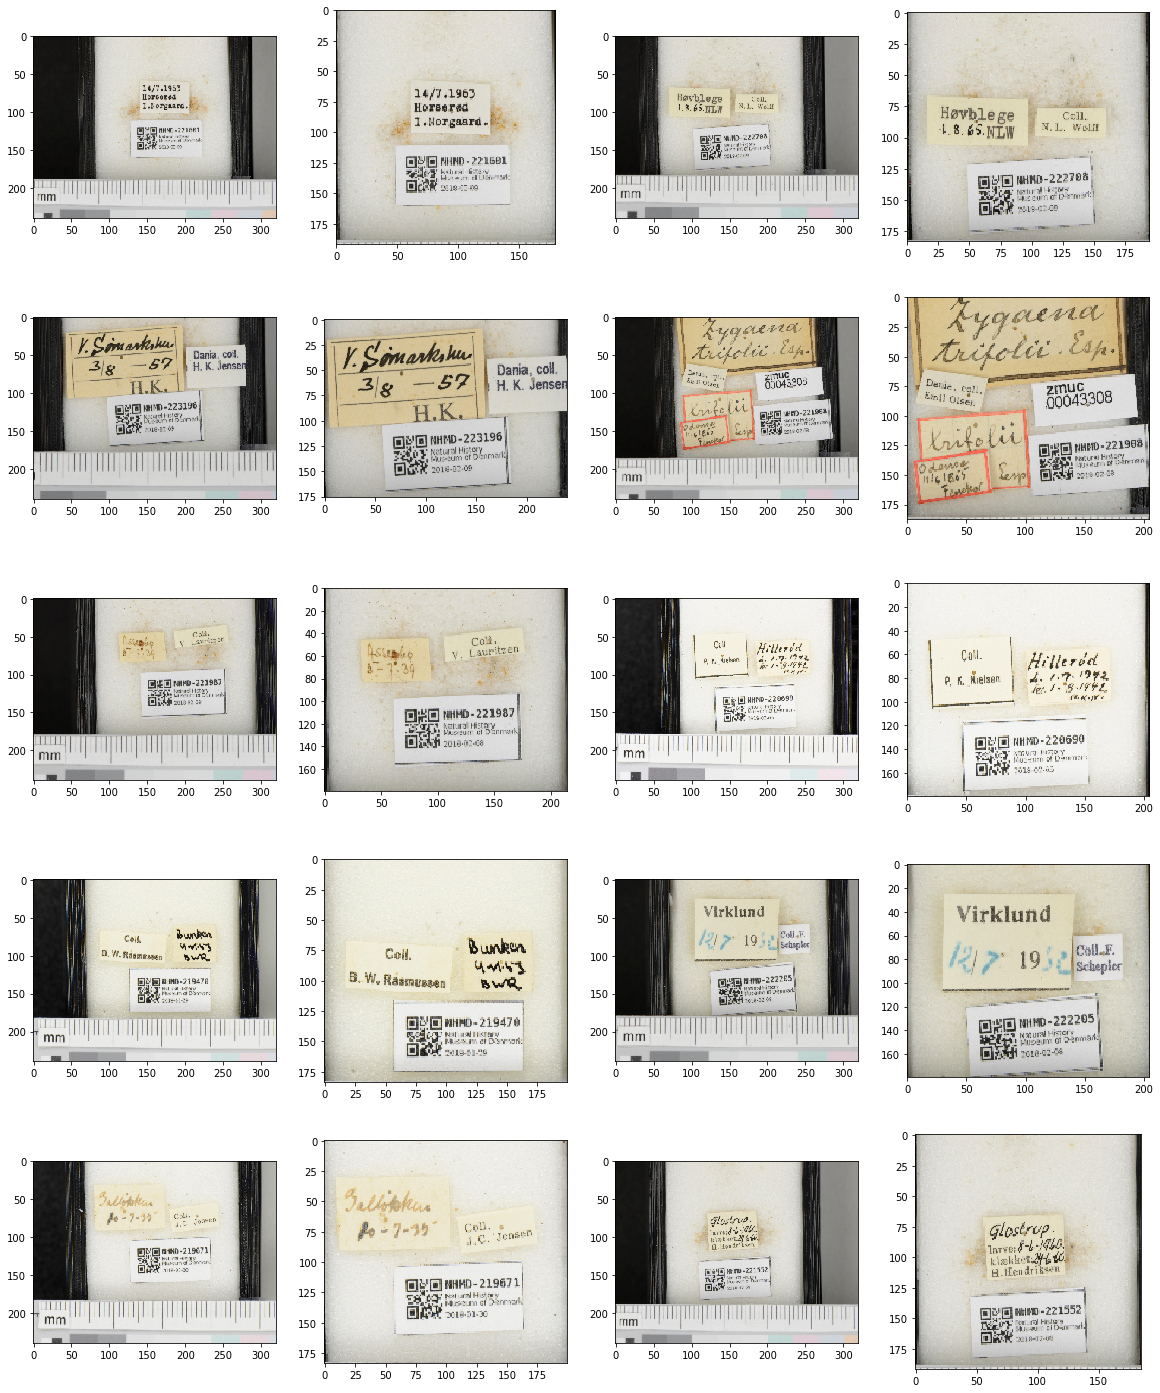

In [93]:
fig=plt.figure(figsize=(20, 25))
columns = 2
rows = 5
n_images = columns*rows

sample = np.random.permutation(fps)

for i in tqdm(range(1, n_images+1)):
    fp = sample[i-1]
    img = cv2.resize(cv2.imread(fp),(160*2,120*2))
    fig.add_subplot(rows, columns*2, i*2 -1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    cropped = crop(img)
    fig.add_subplot(rows, columns*2, i*2)
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.show()

In [51]:
strip_width

184

In [30]:
def crop(img):
    start_timer()
    n_strips = 300
    bottom = img.shape[0]
    left = 0
    right = img.shape[1]

    #find bottom
    halfway = img.shape[0]//2
    strip_height = halfway//n_strips

    for i in range(n_strips):
        start = halfway + i*strip_height
        end = halfway + (i+1)*strip_height
        strip = img[start:end,:,:]

        #plt.figure()
        #plt.imshow(strip)
        bins = [0,127,255]
        dens, _ = np.histogram(strip, bins=bins, density=True)
        dens = dens*[127,128] #numpy normalizes also by the size of the bin
        #plt.title(dens)
        if dens[0] < 0.1:
            bottom = start
            break

    #find left edge
    halfway = img.shape[1]//2
    strip_width = halfway//n_strips

    for i in range(n_strips):
        start = i*strip_width
        end = (i+1)*strip_width
        strip = img[:,start:end,:]

        #plt.figure()
        #plt.imshow(strip)
        bins = [0,127,255]
        dens, _ = np.histogram(strip, bins=bins, density=True)
        dens = dens*[127,128] #numpy normalizes also by the size of the bin
        #plt.title(dens)
        if (dens[0] < 0.6):
            left = start
            break

    #find right edge 
    for i in range(n_strips):
        start = halfway + i*strip_width
        end = halfway + (i+1)*strip_width
        strip = img[:,start:end,:]

        bins = [0,127,255]
        dens, _ = np.histogram(strip, bins=bins, density=True)
        dens = dens*[127,128] #numpy normalizes also by the size of the bin
        if (dens[0] > 0.68):
            right = start
            break


    #cropped = img[:bottom,left:right,:]
    #plt.figure()
    #plt.imshow(img)
    #plt.figure()
    #plt.imshow(cropped)
    #tick()
    return img[:bottom,left:right,:]

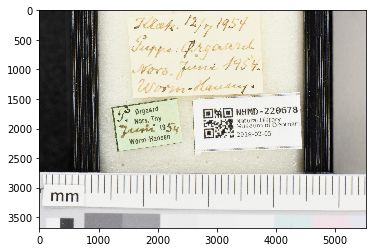

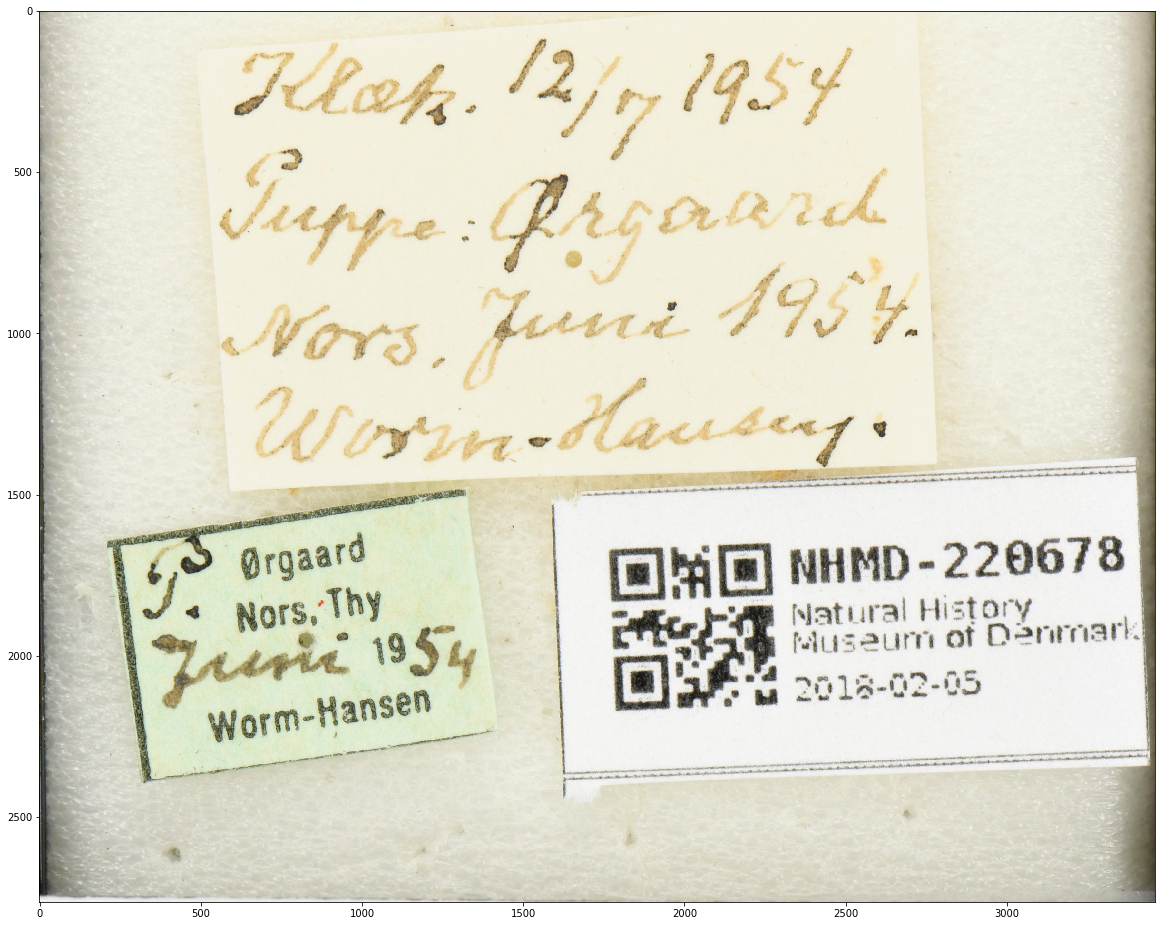

In [32]:
num = np.random.choice(range(3800))
fp = fps[num]
#fp = '/home/rob/HWR/datasets/zooniverse/221177/Preview002.jpg'

raw = cv2.imread(fp)
plt.figure()
plt.imshow(cv2.cvtColor(raw, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(crop(raw), cv2.COLOR_BGR2RGB))